# Step 1 Problem Statement 

* You are hired as a data scientist in serven which is a wine producing company and they want to you to predict the price of new variety of wine by the given data of old wine production 

# Step 2 Import the libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Step 3 Read the data from data csv in a dataframe

In [2]:
train_data = pd.read_csv(r'D:\MachineLearning\DataScience-Projects\USAHousePricePredections(KFoldCrossValidation)\USA_Housing.csv')

In [3]:
train_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
train_data.shape
train_data=train_data.drop(['Address'],axis=1)

(5000, 7)

In [5]:
train_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


#### Some of the observations we made are,
* The average price of the house in USA is 1.232073e+06
* The minimum price of the house in USA is 1.593866e+04
* The Maximum price of the house in USA is 2.469066e+06
* The max age of an house in USA is 9.5 years

# Step 4 Check for the missing values

In [3]:
train_data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

* There are no missing data in the dataset, so we dont need data cleaning process

# Step 5 Data Visualization

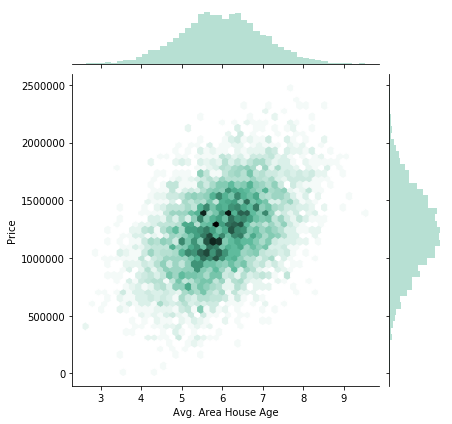

In [8]:
sns.jointplot(x="Avg. Area House Age",y="Price",             
             data=train_data,kind='hex',color="#4CB391")

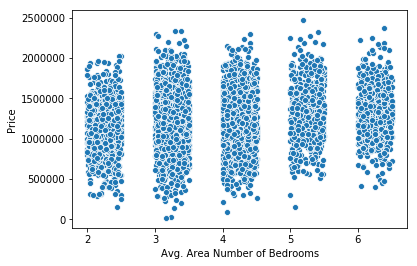

In [15]:
sns.scatterplot(x="Avg. Area Number of Bedrooms",y="Price",             
             data=train_data)

# Step 6 Modeling the data

In [200]:
train_data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [223]:
X = train_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = train_data['Price']

In [224]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [225]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [253]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [227]:
X_train.shape

(4000, 5)

In [207]:
X_test.shape

(1000, 5)

In [254]:
from sklearn.linear_model import LinearRegression
LinearReg = LinearRegression()
LinearReg.fit(X_train, y_train)
y_pred=LinearReg.predict(X_test)

In [255]:
print("Accuracy using Linear Reg is",LinearReg.score(X,y)*100)

Accuracy using Linear Reg is 91.80061818411541


In [257]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [258]:
print("Accuracy using SVR Reg is",svr.score(X,y)*100)

Accuracy using SVR Reg is 0.0003348090701460471


In [265]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor(n_estimators=100)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)

In [266]:
print("Accuracy using Random Forest is",randomforest.score(X,y)*100)

Accuracy using Random Forest is 96.33716432526217


* Now we can see the differnt models gives us different results and from all these random forest gives us the best results.
* The problem here is if for each train test split our models gives us differnt resutls so it will be difficult to judge the model.
* To overcome the above problem we are going to implement the K Fold Cross validation technique.

# K Fold Cross Validation Implementation

In [306]:
from sklearn.model_selection import KFold
scores_linearReg=[]
best_linear = LinearRegression()
cv = KFold(n_splits=10)
for train_index,test_index in cv.split(train_data):
    print("Train Index:", train_index,"\n")
    print("Test Index:", test_index,"\n")
    X_train,X_test,y_train,y_test=X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
    best_linear.fit(X_train,y_train)
    scores_linearReg.append(best_linear.score(X,y))

Train Index: [ 500  501  502 ... 4997 4998 4999] 

Test Index: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 

### Here we have cretaed 10 folds of our data,
 * when  the first fold fold is taken as test data, the remaining 9 folds are taken as training data and similarly the score is calculated for each pair of train and test split
 * so at the end to get the  score of our model we can take the avg of the list which contains the score 
 

In [310]:
scores_linearReg

[0.9180175798583566,
 0.9180167421829376,
 0.9180188471326888,
 0.9180078714668448,
 0.9180171536777734,
 0.9180162573277766,
 0.9179993483899558,
 0.9180189637640279,
 0.9180178506703712,
 0.9180147479474334]

### In our model creation step we have created three models now we can apply K-Fold validation on all the three models


In [312]:
##creating a method that generalize the model fitting process
def get_score(model,X,y):
    model.fit(X,y)
    return model.score(X,y)b

In [324]:
## Now we are copying the above code for k fold cross validation to apply it on all the three models
from sklearn.model_selection import KFold
scores_linearReg=[]
scores_svm=[]
scores_rf=[]
best_linear = LinearRegression()
cv = KFold(n_splits=10)
for train_index,test_index in cv.split(train_data):
    print("Train Index:", train_index,"\n")
    print("Test Index:", test_index,"\n")
    X_train,X_test,y_train,y_test=X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
    scores_linearReg.append(get_score(LinearRegression(),X_train,y_train))
    scores_svm.append(get_score(SVR(),X_train,y_train))
    scores_rf.append(get_score(RandomForestRegressor(n_estimators=100),X_train,y_train))

Train Index: [ 500  501  502 ... 4997 4998 4999] 

Test Index: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 

C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index: [   0    1    2 ... 4997 4998 4999] 

Test Index: [500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535
 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553
 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571
 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589
 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607
 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625
 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643
 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661
 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679
 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697
 698 699 700 701 702 703 704 705 706 707 708 709 710 711 712 713 714 715
 716 717 718 719 720 721 722 723 724 725 726 727 728 729 730 

C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index: [   0    1    2 ... 4997 4998 4999] 

Test Index: [1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181
 1182 1183 118

C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index: [   0    1    2 ... 4997 4998 4999] 

Test Index: [1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 1654 1655 1656 1657 1658 1659 1660 1661 1662 1663 1664 1665 1666 1667
 1668 1669 1670 1671 1672 1673 1674 1675 1676 1677 1678 1679 1680 1681
 1682 1683 168

C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index: [   0    1    2 ... 4997 4998 4999] 

Test Index: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027
 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041
 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055
 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069
 2070 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082 2083
 2084 2085 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096 2097
 2098 2099 2100 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111
 2112 2113 2114 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124 2125
 2126 2127 2128 2129 2130 2131 2132 2133 2134 2135 2136 2137 2138 2139
 2140 2141 2142 2143 2144 2145 2146 2147 2148 2149 2150 2151 2152 2153
 2154 2155 2156 2157 2158 2159 2160 2161 2162 2163 2164 2165 2166 2167
 2168 2169 2170 2171 2172 2173 2174 2175 2176 2177 2178 2179 2180 2181
 2182 2183 218

C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index: [   0    1    2 ... 4997 4998 4999] 

Test Index: [2500 2501 2502 2503 2504 2505 2506 2507 2508 2509 2510 2511 2512 2513
 2514 2515 2516 2517 2518 2519 2520 2521 2522 2523 2524 2525 2526 2527
 2528 2529 2530 2531 2532 2533 2534 2535 2536 2537 2538 2539 2540 2541
 2542 2543 2544 2545 2546 2547 2548 2549 2550 2551 2552 2553 2554 2555
 2556 2557 2558 2559 2560 2561 2562 2563 2564 2565 2566 2567 2568 2569
 2570 2571 2572 2573 2574 2575 2576 2577 2578 2579 2580 2581 2582 2583
 2584 2585 2586 2587 2588 2589 2590 2591 2592 2593 2594 2595 2596 2597
 2598 2599 2600 2601 2602 2603 2604 2605 2606 2607 2608 2609 2610 2611
 2612 2613 2614 2615 2616 2617 2618 2619 2620 2621 2622 2623 2624 2625
 2626 2627 2628 2629 2630 2631 2632 2633 2634 2635 2636 2637 2638 2639
 2640 2641 2642 2643 2644 2645 2646 2647 2648 2649 2650 2651 2652 2653
 2654 2655 2656 2657 2658 2659 2660 2661 2662 2663 2664 2665 2666 2667
 2668 2669 2670 2671 2672 2673 2674 2675 2676 2677 2678 2679 2680 2681
 2682 2683 268

C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index: [   0    1    2 ... 4997 4998 4999] 

Test Index: [3000 3001 3002 3003 3004 3005 3006 3007 3008 3009 3010 3011 3012 3013
 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023 3024 3025 3026 3027
 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037 3038 3039 3040 3041
 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051 3052 3053 3054 3055
 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065 3066 3067 3068 3069
 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079 3080 3081 3082 3083
 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093 3094 3095 3096 3097
 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107 3108 3109 3110 3111
 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121 3122 3123 3124 3125
 3126 3127 3128 3129 3130 3131 3132 3133 3134 3135 3136 3137 3138 3139
 3140 3141 3142 3143 3144 3145 3146 3147 3148 3149 3150 3151 3152 3153
 3154 3155 3156 3157 3158 3159 3160 3161 3162 3163 3164 3165 3166 3167
 3168 3169 3170 3171 3172 3173 3174 3175 3176 3177 3178 3179 3180 3181
 3182 3183 318

C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index: [   0    1    2 ... 4997 4998 4999] 

Test Index: [3500 3501 3502 3503 3504 3505 3506 3507 3508 3509 3510 3511 3512 3513
 3514 3515 3516 3517 3518 3519 3520 3521 3522 3523 3524 3525 3526 3527
 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541
 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555
 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569
 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583
 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597
 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611
 3612 3613 3614 3615 3616 3617 3618 3619 3620 3621 3622 3623 3624 3625
 3626 3627 3628 3629 3630 3631 3632 3633 3634 3635 3636 3637 3638 3639
 3640 3641 3642 3643 3644 3645 3646 3647 3648 3649 3650 3651 3652 3653
 3654 3655 3656 3657 3658 3659 3660 3661 3662 3663 3664 3665 3666 3667
 3668 3669 3670 3671 3672 3673 3674 3675 3676 3677 3678 3679 3680 3681
 3682 3683 368

C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index: [   0    1    2 ... 4997 4998 4999] 

Test Index: [4000 4001 4002 4003 4004 4005 4006 4007 4008 4009 4010 4011 4012 4013
 4014 4015 4016 4017 4018 4019 4020 4021 4022 4023 4024 4025 4026 4027
 4028 4029 4030 4031 4032 4033 4034 4035 4036 4037 4038 4039 4040 4041
 4042 4043 4044 4045 4046 4047 4048 4049 4050 4051 4052 4053 4054 4055
 4056 4057 4058 4059 4060 4061 4062 4063 4064 4065 4066 4067 4068 4069
 4070 4071 4072 4073 4074 4075 4076 4077 4078 4079 4080 4081 4082 4083
 4084 4085 4086 4087 4088 4089 4090 4091 4092 4093 4094 4095 4096 4097
 4098 4099 4100 4101 4102 4103 4104 4105 4106 4107 4108 4109 4110 4111
 4112 4113 4114 4115 4116 4117 4118 4119 4120 4121 4122 4123 4124 4125
 4126 4127 4128 4129 4130 4131 4132 4133 4134 4135 4136 4137 4138 4139
 4140 4141 4142 4143 4144 4145 4146 4147 4148 4149 4150 4151 4152 4153
 4154 4155 4156 4157 4158 4159 4160 4161 4162 4163 4164 4165 4166 4167
 4168 4169 4170 4171 4172 4173 4174 4175 4176 4177 4178 4179 4180 4181
 4182 4183 418

C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index: [   0    1    2 ... 4497 4498 4499] 

Test Index: [4500 4501 4502 4503 4504 4505 4506 4507 4508 4509 4510 4511 4512 4513
 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523 4524 4525 4526 4527
 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537 4538 4539 4540 4541
 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551 4552 4553 4554 4555
 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565 4566 4567 4568 4569
 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579 4580 4581 4582 4583
 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593 4594 4595 4596 4597
 4598 4599 4600 4601 4602 4603 4604 4605 4606 4607 4608 4609 4610 4611
 4612 4613 4614 4615 4616 4617 4618 4619 4620 4621 4622 4623 4624 4625
 4626 4627 4628 4629 4630 4631 4632 4633 4634 4635 4636 4637 4638 4639
 4640 4641 4642 4643 4644 4645 4646 4647 4648 4649 4650 4651 4652 4653
 4654 4655 4656 4657 4658 4659 4660 4661 4662 4663 4664 4665 4666 4667
 4668 4669 4670 4671 4672 4673 4674 4675 4676 4677 4678 4679 4680 4681
 4682 4683 468

C:\Users\inkuml05\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [322]:
scores_linearReg

[0.9185097659942318,
 0.9175417622737241,
 0.9181095681521955,
 0.917302861545707,
 0.9185651998330171,
 0.918032705834769,
 0.9181180786656908,
 0.9172131797441745,
 0.9176397898769869,
 0.9192417516702076]

In [323]:
scores_svm

[3.716652127838671e-06,
 -9.571290941812194e-06,
 -8.898060423589982e-06,
 4.495855987052266e-06,
 3.388593525666117e-06,
 3.905461229303242e-06,
 -2.5454485429232676e-05,
 -6.840803023377973e-06,
 -4.606665701500923e-05,
 2.1529556952781803e-06]

In [327]:
scores_rf

[0.9841025459971513,
 0.9840310073270008,
 0.9840244805817059,
 0.9840412254598723,
 0.9842389251621613,
 0.9840184514987922,
 0.9839984439883761,
 0.9838375044819603,
 0.9839721365307685,
 0.9843818553842897]

In [329]:
## Show the accuracy of each model 
print('The Accuracy of Linear Regression after K-Fold',np.mean(scores_linearReg)*100)
print('The Accuracy of SVM Regression after K-Fold',np.mean(scores_svm)*100)
print('The Accuracy of Random Forest Regression after K-Fold',np.mean(scores_rf)*100)

The Accuracy of Linear Regression after K-Fold 91.80274663590706
The Accuracy of SVM Regression after K-Fold -0.0007917177826788359
The Accuracy of Random Forest Regression after K-Fold 98.40646576412078


## We can See that Random Forest Performed better in all the cases 